In [1]:
import numpy as np
import matplotlib.pyplot as plt

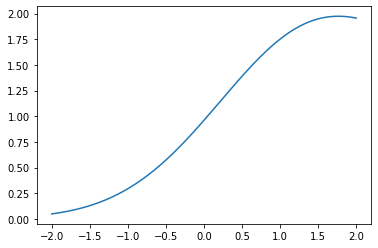

In [5]:
mus = np.array([4.0, 2.0, 1.0])
w = np.array([1.0, 1.0, 1.0])
s = 1.2

def gb(x, mu):
    return np.exp(-(x - mu)**2 / (2 * s**2))

x = np.linspace(-2, 2, 200)
y = gb(x, mus[0]) + gb(x, mus[1]) + gb(x, mus[2])

plt.plot(x,y)

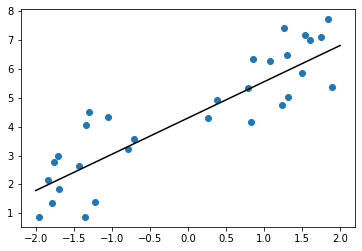

In [29]:
w = np.array([4.3, 1.256])

x_data = np.random.uniform(-2, 2, 30)
X = np.stack([np.ones_like(x_data), x_data], axis=1)
xp = np.linspace(-2, 2, 100)
y_data = X @ w + np.random.randn((len(x_data)))

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(xp, w[0] + xp * w[1], color='k')

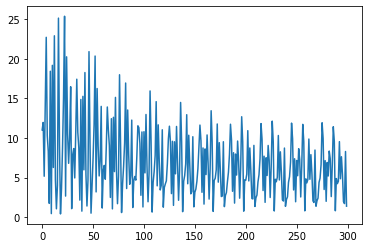

In [45]:
w_t = np.zeros_like(w)

eta = 0.005

def model(x, w):
    return w[0] + x * w[1]

def loss(x, w, y):
    return 0.5 * np.sum((model(x,w) - y)**2)

loss_traj = np.zeros(len(x_data) * 10)
for epoch in range(10):
    for n in range(len(x_data)):
        w_t -= eta * (model(x_data[n], w_t) - y_data[n]) * x_data[n]

        idx = epoch * (len(x_data)) + n
        loss_traj[idx] = loss(x_data[n], w_t, y_data[n])

plt.plot(loss_traj)

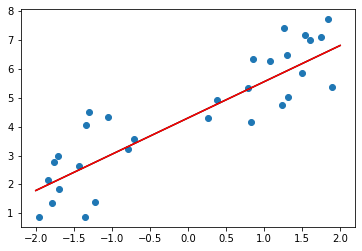

In [46]:
xp = np.linspace(-2, 2, 100)
y_pred = model(xp, w)

fig, ax = plt.subplots()
ax.scatter(x_data, y_data)
ax.plot(xp, w[0] + xp * w[1], color='k')
ax.plot(xp, y_pred, color='r')

In [61]:
n_datasets = 100

n_x = 25

def h(x):
    return np.sin(2*np.pi*x) + 0.1 * np.random.randn(*x.shape)

data = np.zeros((n_datasets, n_x, 2))
data[:, :, 0] = np.random.uniform(0, 1, size=(n_datasets, n_x))
data[:, :, 1] = h(data[:,:,0])

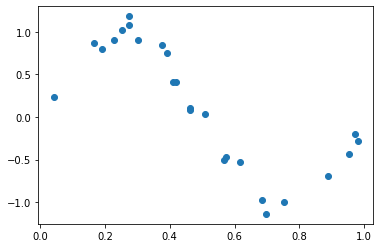

In [62]:
plt.scatter(data[3,:,0], data[3,:,1])

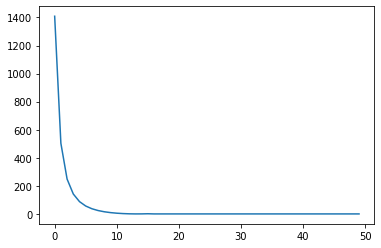

In [95]:
def gb(x, mu, s: float = 1.0):
    """Gaussian basis function."""
    return np.exp(-(x - mu)**2 / (2*s**2))
mu_gb = np.linspace(start=0, stop=1, num=24)


def model(x, w):
    return w[0] + np.sum(np.array([gb(x, mu) for mu in mu_gb]) @ w[1:])

def model_all(X, w):
    return np.array([model(x, w) for x in X])


def sgd_update(x, y, w, eta = 0.005, lambda_ = 0.0):
    y_pred = model(x,w)
    return w - eta * ((y_pred - y) * y_pred + lambda_ * np.sum(np.abs(w)))

def sgd_epoch(X, Y, w, eta = 0.005, lambda_ = 0.0):
    for n in range(len(X)):
        w = sgd_update(X[n], Y[n], w, eta, lambda_)
    return w

def sq_loss(X, Y, w, lambda_ = 0.0):
    return np.sum(model_all(X, w) - Y)**2 / (2*len(X)) + lambda_ * np.sum(w**2) / 2

w = np.random.uniform(0, 1, 25)

n_epochs = 50
losses = np.zeros(n_epochs)
losses[0] = sq_loss(data[0,:,0], data[0,:,1], w)
for epoch in range(1,16):
    w = sgd_epoch(data[0,:,0], data[0,:,1], w, eta=0.0001, lambda_=0.5)
    losses[epoch] = sq_loss(data[0,:,0], data[0,:,1], w)

fig, ax = plt.subplots()
ax.plot(losses)
